In [2]:
!pip install facenet_pytorch

In [3]:
!pip install matplotlib

In [4]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn

import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import glob
import os
# from tensorflow.keras.models import load_model

# from tensorflow.keras.models import Model
import os
import warnings


from torch.utils.data import random_split
from torch.utils.data import DataLoader,Dataset
import torch.nn.functional as F
import torch.optim as optim



/home/csgrad/kaushik3/miniconda3/envs/llm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.gender_mapping = {'males': 0, 'females': 1}
        self.ethnicity_mapping = {'indian': 0, 'white': 1, 'asian': 2, 'black': 3}
        


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['Path']
        image = Image.open(img_path).convert('RGB')

        # imageAligned, prob = mtcnn(image, return_prob=True)
        # #print(type(imageAligned))
        # if(imageAligned!=None):
        #     image = imageAligned
            
        # else:
        #     transform = transforms.Compose([transforms.ToTensor()])
        #     image = transform(image)
        gender = self.data.iloc[idx]['Gender']
        ethnicity = self.data.iloc[idx]['Ethnicity']
        age = self.data.iloc[idx]['predictedAge']
        id = self.data.iloc[idx]['Id']

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        label = {
            'name': id,
            'age': age,
            'gender': self.gender_mapping.get(gender, 0),  # -1 for unknown
            'ethnicity': self.ethnicity_mapping.get(ethnicity, 0),
        
        }
        return image,label

# Example usage:
csv_file_path = '/home/csgrad/kaushik3/PolyProtect/PolyProtect_HEAAN/HEAAN/code/FGPaper/Data/BFW/bfw_id.csv'  # Replace with the actual path to your CSV file
transform = transforms.Compose([
    transforms.Resize((112, 112)),  # Resize the image to the desired size
    transforms.ToTensor(),          # Convert the image to a tensor
    transforms.Normalize(mean=[0.5, 0.5,0.5], std=[0.5,0.5,0.5])  # Normalize the image
])


dataset = CustomDataset(csv_file_path, transform=transform)

In [7]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create dataloaders for training and testing sets
trainloader = DataLoader(dataset, batch_size=64, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [8]:
next(iter(trainloader))

[tensor([[[[-0.5922, -0.5529, -0.5137,  ..., -0.5059, -0.4980, -0.4980],
           [-0.5529, -0.5843, -0.3333,  ..., -0.5137, -0.4980, -0.4980],
           [-0.5608, -0.5137, -0.3176,  ..., -0.4980, -0.5059, -0.5059],
           ...,
           [-0.9059, -0.9137, -0.9059,  ...,  0.6784,  0.2784, -0.3882],
           [-0.9137, -0.9294, -0.9137,  ...,  0.4588,  0.5451, -0.3412],
           [-0.9216, -0.8902, -0.8275,  ...,  0.1294,  0.7804,  0.0510]],
 
          [[-0.5451, -0.5451, -0.3961,  ..., -0.4980, -0.4980, -0.4980],
           [-0.5529, -0.4980, -0.0588,  ..., -0.5059, -0.4980, -0.4980],
           [-0.5451, -0.3412,  0.0902,  ..., -0.4980, -0.4980, -0.5059],
           ...,
           [-0.8667, -0.8824, -0.8980,  ...,  0.7333,  0.3412, -0.2784],
           [-0.8510, -0.8431, -0.8353,  ...,  0.5059,  0.6235, -0.3020],
           [-0.8353, -0.7490, -0.6471,  ...,  0.2000,  0.8745,  0.1059]],
 
          [[-0.5294, -0.5686, -0.2941,  ..., -0.5059, -0.4980, -0.4980],
           [-

In [9]:
def imshow(img):
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

tensor(2)


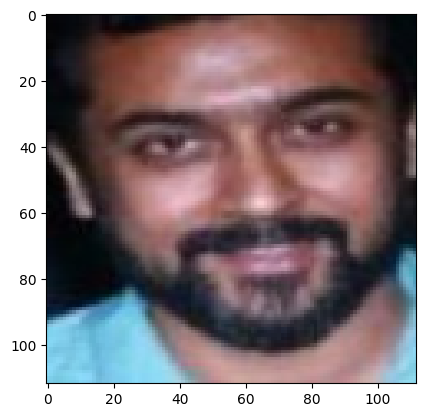

tensor(2)


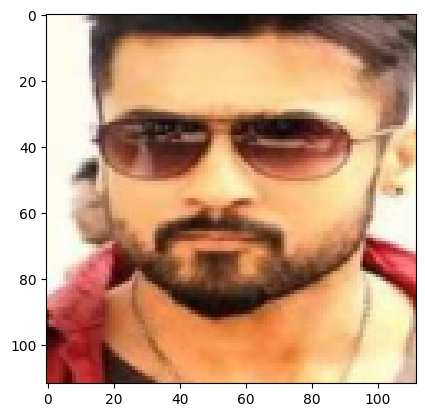

tensor(2)


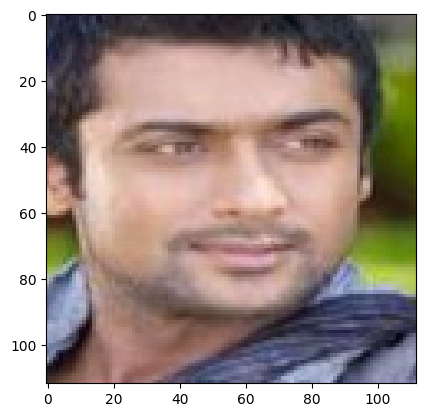

tensor(0)


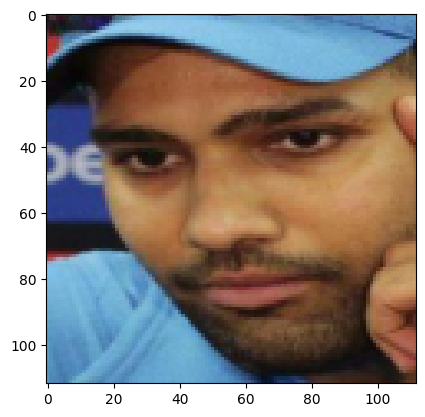

tensor(1)


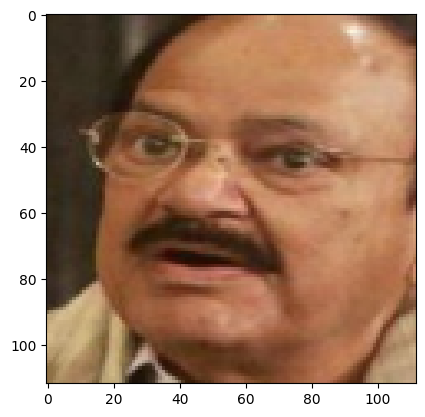

tensor(1)


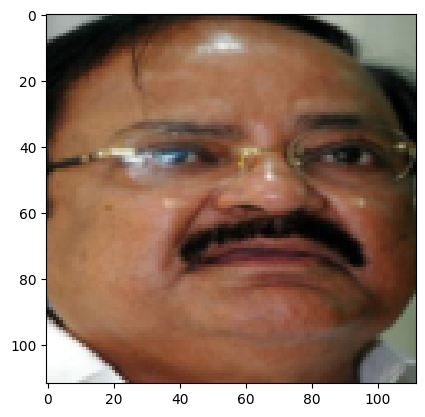

In [10]:
img,labels = next(iter(trainloader))

print(labels['name'][51])
imshow(img[51,:,:,:])
print(labels['name'][52])
imshow(img[52,:,:,:])
print(labels['name'][53])
imshow(img[53,:,:,:])
print(labels['name'][3])
imshow(img[3,:,:,:])
print(labels['name'][34])
imshow(img[34,:,:,:])
print(labels['name'][35])
imshow(img[35,:,:,:])

In [11]:
# tempIter = iter(testloader)
# images,gen_pairs, imp_pairs = next(tempIter)
# # imshow(images[0])
# # print(labels['age'][0],labels['gender'][0],labels['ethnicity'][0])
# # print(image_pairs)
# imshow(images[0])
# imshow(gen_pairs[0][0])
# imshow(imp_pairs[0][0])

In [12]:
from collections import namedtuple
import torch
import torch.nn as nn
from torch.nn import Dropout
from torch.nn import MaxPool2d
from torch.nn import Sequential
from torch.nn import Conv2d, Linear
from torch.nn import BatchNorm1d, BatchNorm2d
from torch.nn import ReLU, Sigmoid
from torch.nn import Module
from torch.nn import PReLU
import os

def build_model(model_name='ir_50'):
    if model_name == 'ir_101':
        return IR_101(input_size=(112,112))
    elif model_name == 'ir_50':
        return IR_50(input_size=(112,112))
    elif model_name == 'ir_se_50':
        return IR_SE_50(input_size=(112,112))
    elif model_name == 'ir_34':
        return IR_34(input_size=(112,112))
    elif model_name == 'ir_18':
        return IR_18(input_size=(112,112))
    else:
        raise ValueError('not a correct model name', model_name)

def initialize_weights(modules):
    """ Weight initilize, conv2d and linear is initialized with kaiming_normal
    """
    for m in modules:
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight,
                                    mode='fan_out',
                                    nonlinearity='relu')
            if m.bias is not None:
                m.bias.data.zero_()
        elif isinstance(m, nn.BatchNorm2d):
            m.weight.data.fill_(1)
            m.bias.data.zero_()
        elif isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight,
                                    mode='fan_out',
                                    nonlinearity='relu')
            if m.bias is not None:
                m.bias.data.zero_()


class Flatten(Module):
    """ Flat tensor
    """
    def forward(self, input):
        return input.view(input.size(0), -1)


class LinearBlock(Module):
    """ Convolution block without no-linear activation layer
    """
    def __init__(self, in_c, out_c, kernel=(1, 1), stride=(1, 1), padding=(0, 0), groups=1):
        super(LinearBlock, self).__init__()
        self.conv = Conv2d(in_c, out_c, kernel, stride, padding, groups=groups, bias=False)
        self.bn = BatchNorm2d(out_c)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return x


class GNAP(Module):
    """ Global Norm-Aware Pooling block
    """
    def __init__(self, in_c):
        super(GNAP, self).__init__()
        self.bn1 = BatchNorm2d(in_c, affine=False)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.bn2 = BatchNorm1d(in_c, affine=False)

    def forward(self, x):
        x = self.bn1(x)
        x_norm = torch.norm(x, 2, 1, True)
        x_norm_mean = torch.mean(x_norm)
        weight = x_norm_mean / x_norm
        x = x * weight
        x = self.pool(x)
        x = x.view(x.shape[0], -1)
        feature = self.bn2(x)
        return feature


class GDC(Module):
    """ Global Depthwise Convolution block
    """
    def __init__(self, in_c, embedding_size):
        super(GDC, self).__init__()
        self.conv_6_dw = LinearBlock(in_c, in_c,
                                     groups=in_c,
                                     kernel=(7, 7),
                                     stride=(1, 1),
                                     padding=(0, 0))
        self.conv_6_flatten = Flatten()
        self.linear = Linear(in_c, embedding_size, bias=False)
        self.bn = BatchNorm1d(embedding_size, affine=False)

    def forward(self, x):
        x = self.conv_6_dw(x)
        x = self.conv_6_flatten(x)
        x = self.linear(x)
        x = self.bn(x)
        return x


class SEModule(Module):
    """ SE block
    """
    def __init__(self, channels, reduction):
        super(SEModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = Conv2d(channels, channels // reduction,
                          kernel_size=1, padding=0, bias=False)

        nn.init.xavier_uniform_(self.fc1.weight.data)

        self.relu = ReLU(inplace=True)
        self.fc2 = Conv2d(channels // reduction, channels,
                          kernel_size=1, padding=0, bias=False)

        self.sigmoid = Sigmoid()

    def forward(self, x):
        module_input = x
        x = self.avg_pool(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)

        return module_input * x



class BasicBlockIR(Module):
    """ BasicBlock for IRNet
    """
    def __init__(self, in_channel, depth, stride):
        super(BasicBlockIR, self).__init__()
        if in_channel == depth:
            self.shortcut_layer = MaxPool2d(1, stride)
        else:
            self.shortcut_layer = Sequential(
                Conv2d(in_channel, depth, (1, 1), stride, bias=False),
                BatchNorm2d(depth))
        self.res_layer = Sequential(
            BatchNorm2d(in_channel),
            Conv2d(in_channel, depth, (3, 3), (1, 1), 1, bias=False),
            BatchNorm2d(depth),
            PReLU(depth),
            Conv2d(depth, depth, (3, 3), stride, 1, bias=False),
            BatchNorm2d(depth))

    def forward(self, x):
        shortcut = self.shortcut_layer(x)
        res = self.res_layer(x)

        return res + shortcut


class BottleneckIR(Module):
    """ BasicBlock with bottleneck for IRNet
    """
    def __init__(self, in_channel, depth, stride):
        super(BottleneckIR, self).__init__()
        reduction_channel = depth // 4
        if in_channel == depth:
            self.shortcut_layer = MaxPool2d(1, stride)
        else:
            self.shortcut_layer = Sequential(
                Conv2d(in_channel, depth, (1, 1), stride, bias=False),
                BatchNorm2d(depth))
        self.res_layer = Sequential(
            BatchNorm2d(in_channel),
            Conv2d(in_channel, reduction_channel, (1, 1), (1, 1), 0, bias=False),
            BatchNorm2d(reduction_channel),
            PReLU(reduction_channel),
            Conv2d(reduction_channel, reduction_channel, (3, 3), (1, 1), 1, bias=False),
            BatchNorm2d(reduction_channel),
            PReLU(reduction_channel),
            Conv2d(reduction_channel, depth, (1, 1), stride, 0, bias=False),
            BatchNorm2d(depth))

    def forward(self, x):
        shortcut = self.shortcut_layer(x)
        res = self.res_layer(x)

        return res + shortcut


class BasicBlockIRSE(BasicBlockIR):
    def __init__(self, in_channel, depth, stride):
        super(BasicBlockIRSE, self).__init__(in_channel, depth, stride)
        self.res_layer.add_module("se_block", SEModule(depth, 16))


class BottleneckIRSE(BottleneckIR):
    def __init__(self, in_channel, depth, stride):
        super(BottleneckIRSE, self).__init__(in_channel, depth, stride)
        self.res_layer.add_module("se_block", SEModule(depth, 16))


class Bottleneck(namedtuple('Block', ['in_channel', 'depth', 'stride'])):
    '''A named tuple describing a ResNet block.'''


def get_block(in_channel, depth, num_units, stride=2):

    return [Bottleneck(in_channel, depth, stride)] +\
           [Bottleneck(depth, depth, 1) for i in range(num_units - 1)]


def get_blocks(num_layers):
    if num_layers == 18:
        blocks = [
            get_block(in_channel=64, depth=64, num_units=2),
            get_block(in_channel=64, depth=128, num_units=2),
            get_block(in_channel=128, depth=256, num_units=2),
            get_block(in_channel=256, depth=512, num_units=2)
        ]
    elif num_layers == 34:
        blocks = [
            get_block(in_channel=64, depth=64, num_units=3),
            get_block(in_channel=64, depth=128, num_units=4),
            get_block(in_channel=128, depth=256, num_units=6),
            get_block(in_channel=256, depth=512, num_units=3)
        ]
    elif num_layers == 50:
        blocks = [
            get_block(in_channel=64, depth=64, num_units=3),
            get_block(in_channel=64, depth=128, num_units=4),
            get_block(in_channel=128, depth=256, num_units=14),
            get_block(in_channel=256, depth=512, num_units=3)
        ]
    elif num_layers == 100:
        blocks = [
            get_block(in_channel=64, depth=64, num_units=3),
            get_block(in_channel=64, depth=128, num_units=13),
            get_block(in_channel=128, depth=256, num_units=30),
            get_block(in_channel=256, depth=512, num_units=3)
        ]
    elif num_layers == 152:
        blocks = [
            get_block(in_channel=64, depth=256, num_units=3),
            get_block(in_channel=256, depth=512, num_units=8),
            get_block(in_channel=512, depth=1024, num_units=36),
            get_block(in_channel=1024, depth=2048, num_units=3)
        ]
    elif num_layers == 200:
        blocks = [
            get_block(in_channel=64, depth=256, num_units=3),
            get_block(in_channel=256, depth=512, num_units=24),
            get_block(in_channel=512, depth=1024, num_units=36),
            get_block(in_channel=1024, depth=2048, num_units=3)
        ]

    return blocks


class Backbone(Module):
    def __init__(self, input_size, num_layers, mode='ir'):
        """ Args:
            input_size: input_size of backbone
            num_layers: num_layers of backbone
            mode: support ir or irse
        """
        super(Backbone, self).__init__()
        assert input_size[0] in [112, 224], \
            "input_size should be [112, 112] or [224, 224]"
        assert num_layers in [18, 34, 50, 100, 152, 200], \
            "num_layers should be 18, 34, 50, 100 or 152"
        assert mode in ['ir', 'ir_se'], \
            "mode should be ir or ir_se"
        self.input_layer = Sequential(Conv2d(3, 64, (3, 3), 1, 1, bias=False),
                                      BatchNorm2d(64), PReLU(64))
        blocks = get_blocks(num_layers)
        if num_layers <= 100:
            if mode == 'ir':
                unit_module = BasicBlockIR
            elif mode == 'ir_se':
                unit_module = BasicBlockIRSE
            output_channel = 512
        else:
            if mode == 'ir':
                unit_module = BottleneckIR
            elif mode == 'ir_se':
                unit_module = BottleneckIRSE
            output_channel = 2048

        if input_size[0] == 112:
            self.output_layer = Sequential(BatchNorm2d(output_channel),
                                        Dropout(0.4), Flatten(),
                                        Linear(output_channel * 7 * 7, 512),
                                        BatchNorm1d(512, affine=False))
        else:
            self.output_layer = Sequential(
                BatchNorm2d(output_channel), Dropout(0.4), Flatten(),
                Linear(output_channel * 14 * 14, 512),
                BatchNorm1d(512, affine=False))

        modules = []
        for block in blocks:
            for bottleneck in block:
                modules.append(
                    unit_module(bottleneck.in_channel, bottleneck.depth,
                                bottleneck.stride))
        self.body = Sequential(*modules)

        initialize_weights(self.modules())


    def forward(self, x):
        
        # current code only supports one extra image
        # it comes with a extra dimension for number of extra image. We will just squeeze it out for now
        x = self.input_layer(x)

        for idx, module in enumerate(self.body):
            x = module(x)

        x = self.output_layer(x)
        norm = torch.norm(x, 2, 1, True)
        output = torch.div(x, norm)

        return output, norm



def IR_18(input_size):
    """ Constructs a ir-18 model.
    """
    model = Backbone(input_size, 18, 'ir')

    return model


def IR_34(input_size):
    """ Constructs a ir-34 model.
    """
    model = Backbone(input_size, 34, 'ir')

    return model


def IR_50(input_size):
    """ Constructs a ir-50 model.
    """
    model = Backbone(input_size, 50, 'ir')

    return model


def IR_101(input_size):
    """ Constructs a ir-101 model.
    """
    model = Backbone(input_size, 100, 'ir')

    return model


def IR_152(input_size):
    """ Constructs a ir-152 model.
    """
    model = Backbone(input_size, 152, 'ir')

    return model


def IR_200(input_size):
    """ Constructs a ir-200 model.
    """
    model = Backbone(input_size, 200, 'ir')

    return model


def IR_SE_50(input_size):
    """ Constructs a ir_se-50 model.
    """
    model = Backbone(input_size, 50, 'ir_se')

    return model


def IR_SE_101(input_size):
    """ Constructs a ir_se-101 model.
    """
    model = Backbone(input_size, 100, 'ir_se')

    return model


def IR_SE_152(input_size):
    """ Constructs a ir_se-152 model.
    """
    model = Backbone(input_size, 152, 'ir_se')

    return model


def IR_SE_200(input_size):
    """ Constructs a ir_se-200 model.
    """
    model = Backbone(input_size, 200, 'ir_se')

    return model


adaface_models = {
    'ir_18':"/home/csgrad/byalavar/FHE/HEAAN/FA_CVPR_Exp/adaface_ir18_webface4m.ckpt",
    'ir_50':"/home/csgrad/byalavar/FHE/HEAAN/FG_Round_2/adaface_ir50_webface4m.ckpt",
    'ir_101':"/home/csgrad/byalavar/FHE/HEAAN/FG_Round_2/adaface_ir101_webface12m.ckpt"
}


def load_pretrained_model(architecture='ir_18'):
    # load model and pretrained statedict
    assert architecture in adaface_models.keys()
    model = build_model(architecture)
    statedict = torch.load(adaface_models[architecture])['state_dict']
    model_statedict = {key[6:]:val for key, val in statedict.items() if key.startswith('model.')}
    model.load_state_dict(model_statedict)
    model.eval()
    return model

def to_input(pil_rgb_image):
    np_img = np.array(pil_rgb_image)
    brg_img = ((np_img[:,:,::-1] / 255.) - 0.5) / 0.5
    tensor = torch.tensor([brg_img.transpose(2,0,1)]).float()
    return tensor

In [13]:
adaFaceModel = load_pretrained_model('ir_101')

# print(images.shape)
# bgr_image = images[:, [2, 1, 0], :, :]
# print(bgr_image.shape)


#feature, _ = adaFaceModel(bgr_image)

In [14]:
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignore DeprecationWarnings
warnings.filterwarnings("ignore", category=FutureWarning) 
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

print('Running on device: {}'.format(device))

Running on device: cuda:1


In [15]:
from torch.nn.modules import MSELoss
from torch.nn.modules.loss import CrossEntropyLoss
from torch.nn.parallel import DataParallel

class GenderDet(nn.Module):
    def __init__(self, compression_size):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(compression_size,64),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,2)
        )
        
    def forward(self, x):
        return self.layer(x)

class AgeDet(nn.Module):
    def __init__(self, compression_size):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(compression_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 6)
        )
        
    def forward(self, x):
        return self.layer(x)
    
class EthnicityDet(nn.Module):
    def __init__(self, compression_size):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(compression_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 4)
        )
        
    def forward(self, x):
        return self.layer(x)
    
class IdentityDet(nn.Module):
    def __init__(self, compression_size):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(compression_size, 128), 
            nn.ReLU(), 
            nn.Linear(128, 512),
            nn.ReLU(), 
            nn.Linear(512, 1024),
            nn.ReLU(), 
            nn.Linear(1024, 800))
        
    def forward(self, x):
        return self.layer(x)
    

class Matryoshka_CE_Loss(nn.Module):
    def __init__(self, relative_importance = 1.0):
        super(Matryoshka_CE_Loss, self).__init__()
        self.criterion = nn.CrossEntropyLoss()
        self.relative_importance = relative_importance # usually set to all ones
    
    def forward(self, output, target):
        loss = 0
        for i in range(len(output)):
            # loss += self.relative_importance[i] * self.criterion(output[i], target)
            loss += self.relative_importance * self.criterion(output[i], target)
        return loss

class MRL_Linear_Layer(nn.Module):
    def __init__(self, nesting_list, num_classes=1000, efficient=False, **kwargs):
        super(MRL_Linear_Layer, self).__init__()
        self.nesting_list=nesting_list
        self.num_classes=num_classes # Number of classes for classification
        self.efficient = efficient
        if self.efficient:
            setattr(self, f"nesting_classifier_{0}", nn.Linear(nesting_list[-1], self.num_classes, **kwargs))		
        else:	
            for i, num_feat in enumerate(self.nesting_list):
                setattr(self, f"nesting_classifier_{i}", nn.Linear(num_feat, self.num_classes, **kwargs))	


    def forward(self, x):
        nesting_logits = ()
        for i, num_feat in enumerate(self.nesting_list):
            if self.efficient:
                if self.nesting_classifier_0.bias is None:
                    nesting_logits+= (torch.matmul(x[:, :num_feat], (self.nesting_classifier_0.weight[:, :num_feat]).t()), )
                else:
                    nesting_logits+= (torch.matmul(x[:, :num_feat], (self.nesting_classifier_0.weight[:, :num_feat]).t()) + self.nesting_classifier_0.bias, )
            else:
                nesting_logits +=  (getattr(self, f"nesting_classifier_{i}")(x[:, :num_feat]),)

        return nesting_logits

class MRL_Model(nn.Module):
    def __init__(self, compression_size, num_classes, efficient=False):
        super(MRL_Model, self).__init__()
        self.ll1 = MRL_Linear_Layer([256], num_classes = compression_size, efficient = efficient)
        self.ll2 = MRL_Linear_Layer([compression_size], num_classes = num_classes, efficient = efficient)
        # self.ll3 = MRL_Linear_Layer([512], num_classes = num_classes, efficient = efficient)
        # self.flatten = nn.Flatten()
        
    def forward(self, x):
        # x = self.flatten(x)
        x_compressed = self.ll1(x)
        y = self.ll2(x_compressed[0])
        # y = self.ll3(y[0])
        return y, x_compressed
    

class CompressionLoss(nn.Module):
    def __init__(self, batch_size):
        super(CompressionLoss, self).__init__()
        self.batch_size = batch_size

    def forward(self, img, genuine_imgs, imposter_imgs, genuine_sim, imposter_sim):
        # img -> base image embedding
        # genuine_imgs, imposter_imgs -> Compressed embeddings of dimension 128
        # genuine_sim, imposter_sim -> cosine smilairty scores of uncompressed embeddings of dimension 512


        # Compute cosine similarity loss
        genuine_loss = 0
        for i in range(len(genuine_imgs)):
            sim_score = F.cosine_similarity(img, genuine_imgs[i])
            genuine_loss += torch.mean(torch.abs(sim_score - genuine_sim[i].view(-1)))

        imp_loss = 0
        for i in range(len(imposter_imgs)):
            imp_sim_score = F.cosine_similarity(img, imposter_imgs[i])
            imp_loss += torch.mean(torch.abs(imp_sim_score - imposter_sim[i].view(-1)))

        
        # Compute Covariance Loss
        # matrix -> Concatenates compressed genuine and imposter embeddings
        
        matrix = torch.cat([genuine_imgs[0], imposter_imgs[0]], dim=0)
        for i in range(1, len(genuine_imgs)):
            matrix = torch.cat([matrix, genuine_imgs[i]], dim = 0)
            matrix = torch.cat([matrix, imposter_imgs[i]], dim = 0)


        mean_matrix = torch.mean(matrix, dim = 0)
        mx = torch.matmul(mean_matrix.t(), mean_matrix)
        vx = torch.matmul(matrix.t(), matrix) / self.batch_size # Dividing by batch size as done here https://github.com/human-analysis/hers-encrypted-image-search/blob/master/deep_mds%2B%2B/nntools/tensorflow/networks/deepmds.py#L94
        cov_matrix = mx - vx
        diag = torch.diag(cov_matrix.diag())
        cov_loss = torch.mean(torch.abs(cov_matrix - diag))
        
        # Compute Supervise Loss - Not used for ArcFace
        # # g_dist -> Concatenates compressed genuine embeddings
        # g_dist = torch.cat([genuine_imgs[0], genuine_imgs[1]], dim = 0)
        # for i in range(2, len(genuine_imgs)):
        #     g_dist = torch.cat([g_dist, genuine_imgs[i]], dim = 0)

        # # g_dist -> Concatenates compressed imposter embeddings
        # imp_dist = torch.cat([imposter_imgs[0], imposter_imgs[1]], dim = 0)
        # for i in range(2, len(imposter_imgs)):
        #     imp_dist = torch.cat([imp_dist, imposter_imgs[i]], dim = 0)

        # gloss = (torch.mean(g_dist) + 1.0) * 0.5
        # iloss = (torch.mean(imp_dist) + 1.0) * 0.5

        # lda_term = iloss / gloss
        # return genuine_loss + imp_loss + 10 * cov_loss 
        return 10*genuine_loss + imp_loss + cov_loss


In [84]:
batch_size = 64
FAmodel=faceAnalytics()
# nesting_list = [64, 128, 256]
# num_classes = 80
compression_size = 64
# MRL_model = MRL_Model(compression_size, num_classes=800)
MRL_model = torch.load('/home/csgrad/kaushik3/PolyProtect/PolyProtect_HEAAN/HEAAN/code/FGPaper/Code/MRL/MRL_BFW_512x64_AdaFace_20.pt')
MRL_Loss = Matryoshka_CE_Loss()
FAmodel.to(device)
MRL_model.to(device)
adaFaceModel.to(device)
adaFaceModel.eval()

TypeError: __init__() missing 1 required positional argument: 'var'

In [16]:
import math
import numpy
def generate_C(C_range, m):
    """ Randomly generates m coefficients for the PolyProtect mapping.

    **Inputs:**

    C_range : integer
        The absolute min/max values of the coefficients range.

    m : int
        The number of coefficients to generate.

    **Outputs:**

    C : 1D numpy array of integers
        Array of m coefficients.

    """

    # Calculate coefficient range (excluding 0):
    neg_range = numpy.arange(-1 * C_range, 0)
    pos_range = numpy.arange(1, C_range + 1)
    whole_range = numpy.concatenate([neg_range, pos_range])

    # Randomly generate m unique coefficients:
    C = numpy.random.permutation(whole_range)[0 : m] # randomly permute the whole range and pick the first few m values

    return C


def generate_E(m):
    """ Randomly generates m exponents for the PolyProtect mapping.

    **Inputs:**

    m : int
        The number of exponents to generate.

    **Outputs:**

    E : 1D numpy array of integers
        Array of m exponents.

    """

    # Randomly generate m unique exponents:
    E = numpy.random.permutation(range(1, m + 1))[0 : m] # permute the integers in the range [1, m]

    return E


def polyprotect(overlap, V):
    """ Maps an embedding to a PolyProtected template.

    **Inputs:**

    overlap : int
        The amount of overlap between sets of embedding elements used to generate each PolyProtected element (0, 1, 2, 3, or 4).

    V : torch.Tensor
        The embedding as a PyTorch tensor.

    **Outputs:**

    P : torch.Tensor
        The PolyProtected template as a PyTorch tensor.

    """
    # print("V = ",V.shape)
    C = torch.tensor([-42, -35, 31, 4], dtype=torch.float32, device=V.device)
    E = torch.tensor([3, 2, 1, 4], dtype=torch.float32, device=V.device)

    if C.shape[0] != E.shape[0]:
        print("Number of coefficients and exponents must be the same.")
        return None
    #print("here")
    # print(C.shape)
    m = C.shape[0] # number of embedding elements used to generate each PolyProtected element
    step_size = m - overlap
    decimal_remainder, integer = math.modf((V.shape[1] - m) / step_size)
    if decimal_remainder > 0:
        padding = math.ceil((1 - decimal_remainder) * step_size)
    else:
        padding = 0
   # print("here1")
    # Pad V by "padding" zeros at the end
    V = torch.cat((V, torch.zeros(padding, device=V.device)), dim=1)

    starting_indices = torch.arange(0, V.shape[1] - m + 1, step_size)
    #print("here2")
    P = torch.zeros((V.shape[0],len(starting_indices)), device=V.device)
    
    for storage_ind, ind in enumerate(starting_indices):
        
        final_ind = ind + m
        crnt_word = V[:, ind:final_ind]
        # print(crnt_word.shape)
        P[:, storage_ind] = torch.sum(C * (crnt_word ** E), dim = 1)
        # print(P)
    #print("here3")
    return P

In [17]:
from scipy.spatial.distance import cosine

In [33]:
# Input Extract code



class faceAnalytics(nn.Module):

    def __init__(self,var):
        super().__init__()
        self.var = var
        self.layer1=nn.Linear(var,256)
        self.dropout1=nn.Dropout(0.2)
        self.layer2=nn.Linear(256,128)
        #self.layer3=nn.Linear(1024,512)
        self.layer4=nn.Linear(128,64)
        self.dropout2=nn.Dropout(0.2)
        self.genderOut=nn.Linear(64,2)
        self.ageOut=nn.Linear(64,6)
        self.ethnicityOut = nn.Linear(64,4)

        # self.maxVal = 0
        # self.min=0
        
    
    def writeResult(self,result):
       output_directory=""
       file_name = "resultAge.txt"

       with open(os.path.join(output_directory, file_name), "w") as file:
        for value in result:
            file.write(f"{value}\n")
    
    def forward(self,x):

        #print("Input",x[0])
        x=self.layer1(x)
        #print(x[0])
        #x=nn.functional.relu(x)
        #x=self.dropout1(x)
        #x=nn.functional.relu(x)
        x=self.layer2(x)
        
        #self.writeResult(x[0])
       # x=self.layer3(x)
        x=self.layer4(x)
        #print(torch.max(torch.abs(x)))
        x=nn.functional.relu(x)
        
        x=self.dropout2(x)
        gender=self.genderOut(x)
        
        age=self.ageOut(x)

        ethn = self.ethnicityOut(x)
        #self.writeResult(age[0])
        #print(gender)
        return gender,age,ethn
    
        
    
    #tempPT,genderLabelTensor,ageLabelTensor,ethnLabelTensor
    def trainModel(self,trainLoader,testLoader,MRL, device,episodes,adaFaceModel):
        
        #maxVal = 0
        learningRate=0.005
        gender_loss = nn.CrossEntropyLoss() 
        age_loss = nn.CrossEntropyLoss()
        ethn_loss = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learningRate,weight_decay=0.003)
        processedTensor = torch.zeros((len(trainLoader.dataset),self.var)).to(device)
        print(processedTensor.shape)
 #processedTensor = torch.zeros((len(train_dataloader.dataset),128))
        ageLabelTensor = torch.zeros((len(trainLoader.dataset))).to(device)
        genderLabelTensor = torch.zeros((len(trainLoader.dataset))).to(device)
        ethnLabelTensor = torch.zeros((len(trainLoader.dataset))).to(device)
        idLabelTensor = torch.zeros((len(trainLoader.dataset))).to(device)
        for e in range(0,episodes):
         total_training_loss =0
         tempAccGender=0
         tempAccAge=0
         tempAccEthn=0
         count=0
         totalGenderLoss=0
         self.train()
         
         for i,data in enumerate(trainLoader):

            inputs = data[0].to(device=device)
            #inputs = inputs.type(torch.double)
            age_label = data[1]["age"].to(device=device)
            gender_label = data[1]["gender"].to(device=device)
            ethn_label = data[1]["ethnicity"].to(device=device)
         #batchSize = 256

        #  ageLabelTensor = ageLabelTensor.type(torch.LongTensor)
        #  genderLabelTensor = genderLabelTensor.type(torch.LongTensor)
        #  ethnLabelTensor = ethnLabelTensor.type(torch.LongTensor)    

        #  while(count<tempPT.shape[0]):
        #     if(count+batchSize<=tempPT.shape[0]):
        #      inputs = tempPT[count:count+batchSize].to(device=device)
        #      age_label = ageLabelTensor[count:count+batchSize].to(device=device)
        #      gender_label = genderLabelTensor[count:count+batchSize].to(device=device)
        #      ethn_label = ethnLabelTensor[count:count+batchSize].to(device=device)
        #     else:
        #        inputs = tempPT[count:].to(device=device)
        #        age_label = ageLabelTensor[count:].to(device=device)
        #        gender_label = genderLabelTensor[count:].to(device=device)
        #        ethn_label = ethnLabelTensor[count:].to(device=device)
            
            
            inputs = inputs[:, [2, 1, 0], :, :]
            inputs,_ = adaFaceModel(inputs)
            output, compressedOut = MRL(inputs)
            inputUpdated = torch.zeros((compressedOut[0].shape[0], 61),device=device)
            inputUpdated = polyprotect(3,compressedOut[0])
            # inputUpdated = compressedOut[0]
            processedTensor[count:count+inputUpdated.shape[0]] = inputUpdated
            idLabelTensor[count:count+inputUpdated.shape[0]] = data[1]['name']
            
            genderLabelTensor[count:count+gender_label.shape[0]] = gender_label
            ethnLabelTensor[count:count+ethn_label.shape[0]] = ethn_label
            #continue
            gender,age,ethn = self(inputUpdated)
            # age=torch.squeeze(age)
            # age=age.type(torch.float32)
            #print(age.shape,age_label.shape)
            #print(gender.shape,gender_label.shape)
            # predictedGender = torch.argmax(gender,dim=1)
            # predictedGender = predictedGender.type(torch.float32)
            #print(gender)
            loss = gender_loss(gender,gender_label) + 4*age_loss(age,age_label) + 4*ethn_loss(ethn,ethn_label)
            #totalGenderLoss = totalGenderLoss + loss.item()
            loss.backward()
            #print("Loss:",loss)
            optimizer.step()
            optimizer.zero_grad()
            total_training_loss = total_training_loss+loss.item()*256

            predictedGender = torch.argmax(gender,dim=1)
            
            
            for j in range(0,predictedGender.shape[0]):
                count=count+1
                #print(predictedGender[j].item(),gender_label[j])
                if(predictedGender[j].item()==gender_label[j]):
                    tempAccGender=tempAccGender+1
            
            predictedAge = torch.argmax(age,dim=1)
            
            for j in range(0,predictedAge.shape[0]):
               
                #print(predictedGender[j].item(),gender_label[j])
                if(predictedAge[j].item()==age_label[j]):
                    tempAccAge=tempAccAge+1
            
            predictedEthn = torch.argmax(ethn,dim=1)
            
            for j in range(0,predictedEthn.shape[0]):
               
                #print(predictedGender[j].item(),gender_label[j])
                if(predictedEthn[j].item()==ethn_label[j]):
                    tempAccEthn=tempAccEthn+1
         
            genderAccuracy =  tempAccGender/count
            ageAccuracy =  tempAccAge/count
            ethnAccuracy =  tempAccEthn/count
            print(count)
            #break
         break;
         print("Training Gender Accuracy:", genderAccuracy,"Age:", ageAccuracy,"Ethn:",ethnAccuracy)
        #  print("\n")
        #  print("Training Ethn Accuracy:", ethnAccuracy,"\n")
        #  print("total training loss:",total_training_loss/16595,"\n")
         #print("\n")
         #print("max observed value: ", maxVal)
        #  if(e%2==0):
        #      self.test(testLoader,device)

        # print(processedTensor.shape,processedTensor[0])
        # print(ageLabelTensor.shape,ageLabelTensor[0])
        # print(genderLabelTensor.shape,genderLabelTensor[0])
        # print(ethnLabelTensor.shape,ethnLabelTensor[0])
        return processedTensor,genderLabelTensor,ageLabelTensor,ethnLabelTensor, idLabelTensor


    def are_values_in_same_class(self,value1, value2):

    # Define class ranges
        class_ranges = [(0, 2),(2,5),(5,13),(13,20),(20,40),(40,60),(60,80),(80,120)]
    
    # Check if both values fall into the same class range
        for class_range in class_ranges:
            if class_range[0] <= value1 <= class_range[1] and class_range[0] <= value2 <= class_range[1]:
                return True
    
        return False

    def test(self,testLoader,resnet,device):

    
        tempAccGender=0
        tempAccAge=0
        tempAccEthn=0
        count=0

        self.eval()
         
        for i,data in enumerate(testLoader):

            inputs = data["image"].to(device=device)
            #inputs = inputs.type(torch.double)
            age_label = data["age"].to(device=device)
            gender_label = data["gender"].to(device=device)
            ethn_label = data["ethnicity"].to(device=device)
            
            
            inputs=resnet(inputs)
            #print(inputs.shape)
            inputUpdated = torch.zeros((inputs.shape[0], 128),device=device)
            for t in range(0,inputs.shape[0]):
             #print(inputs[t].shape,"inputs[t]")   
             inputUpdated[t] = polyprotect(0,inputs[t])
            #print("here4")
            #print(inputUpdated[0])
            gender,age,ethn = self(inputUpdated)
            
            predictedGender = torch.argmax(gender,dim=1)
            for j in range(0,predictedGender.shape[0]):
                count=count+1
                #print(predictedGender[j].item(),gender_label[j])
                if(predictedGender[j].item()==gender_label[j]):
                    tempAccGender=tempAccGender+1
            
            predictedAge = torch.argmax(age,dim=1)
            for j in range(0,predictedAge.shape[0]):
               
                #print(predictedGender[j].item(),gender_label[j])
                if(predictedAge[j].item()==age_label[j]):
                    tempAccAge=tempAccAge+1
            
            predictedEthn = torch.argmax(ethn,dim=1)
            for j in range(0,predictedEthn.shape[0]):
               
                #print(predictedGender[j].item(),gender_label[j])
                if(predictedEthn[j].item()==ethn_label[j]):
                    tempAccEthn=tempAccEthn+1
         
        genderAccuracy =  tempAccGender/count
        ageAccuracy =  tempAccAge/count
        ethnAccuracy =  tempAccEthn/count
        
        print("Test Gender Accuracy:", genderAccuracy,"\n")
        print("Test Age Accuracy:", ageAccuracy,"\n")
        print("Test Ethn Accuracy:", ethnAccuracy,"\n")
   
         #print("\n")
        return genderAccuracy,ageAccuracy, ethnAccuracy
            
       

In [19]:
data,labels = next(iter(trainloader))
data=data.to(device)
temp,_=adaFaceModel(torch.unsqueeze(data[0],0))

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [34]:
var = 61
model=faceAnalytics(var)
model.to(device)
adaFaceModel.to(device)
# MRL_model = MRL_Model(compression_size, num_classes=800)
MRL_model = torch.load('/home/csgrad/kaushik3/PolyProtect/PolyProtect_HEAAN/HEAAN/code/FGPaper/Code/MRL/MRL_BFW_512x64_AdaFace_20.pt')
MRL_model.to(device)
processedTensor,genderLabelTensor,ageLabelTensor,ethnLabelTensor,idLabelTensor = model.trainModel(trainloader,testloader,MRL_model, device,1,adaFaceModel)

# torch.save(processedTensor,"inputCS.pt")
# torch.save(genderLabelTensor,"genderLabelCS.pt")
# torch.save(ageLabelTensor,"ageLabelCS.pt")
# torch.save(ethnLabelTensor,"ethnLabelCS.pt")

torch.Size([20000, 61])
64
128
192
256
320
384
448
512
576
640
704
768
832
896
960
1024
1088
1152
1216
1280
1344
1408
1472
1536
1600
1664
1728
1792
1856
1920
1984
2048
2112
2176
2240
2304
2368
2432
2496
2560
2624
2688
2752
2816
2880
2944
3008
3072
3136
3200
3264
3328
3392
3456
3520
3584
3648
3712
3776
3840
3904
3968
4032
4096
4160
4224
4288
4352
4416
4480
4544
4608
4672
4736
4800
4864
4928
4992
5056
5120
5184
5248
5312
5376
5440
5504
5568
5632
5696
5760
5824
5888
5952
6016
6080
6144
6208
6272
6336
6400
6464
6528
6592
6656
6720
6784
6848
6912
6976
7040
7104
7168
7232
7296
7360
7424
7488
7552
7616
7680
7744
7808
7872
7936
8000
8064
8128
8192
8256
8320
8384
8448
8512
8576
8640
8704
8768
8832
8896
8960
9024
9088
9152
9216
9280
9344
9408
9472
9536
9600
9664
9728
9792
9856
9920
9984
10048
10112
10176
10240
10304
10368
10432
10496
10560
10624
10688
10752
10816
10880
10944
11008
11072
11136
11200
11264
11328
11392
11456
11520
11584
11648
11712
11776
11840
11904
11968
12032
12096
12160
12224
12

In [35]:
# Face Identification
mated_pairs = []
non_mated_pairs = []
base_embeddding = 0
base_id = 0
count = 0
batchSize = 1
#processedTensor = processedTensor.detach().cpu().numpy()
processedTensor = torch.tensor(processedTensor)
random_number = torch.randint(0, 70889, (100,))
cos = nn.CosineSimilarity(dim=0)
accuracy = 0
while(count<processedTensor.shape[0]):

    inputs = processedTensor[count]

    baseid = idLabelTensor[count]

    base_embeddding = inputs.view(1, inputs.shape[0])
    base_id = baseid
    tempCount = 0
    scores=[]
    ids=[]
    # for x in range(0, len(processedTensor)):
        
    #     if(x!=count):
    tempPT = torch.cat((processedTensor[:count], processedTensor[count+1:]))
    tempIT = torch.cat((idLabelTensor[:count], idLabelTensor[count+1:]))    

    print(base_embeddding.shape)
    print(tempPT.shape)
    scores = nn.functional.cosine_similarity(base_embeddding, tempPT,dim=1)
    
        
          
    if(tempIT[torch.argmax(scores)]==base_id):
        accuracy = accuracy + 1
        #print(torch.argmax(scores),count)
        #print(tempIT[torch.argmax(scores)],base_id)
    
    count = count +1
    print(count)
    # if(count>25):
    #     break 
   

print("Accuracy: ",accuracy/count)

/tmp/ipykernel_1839345/3260396749.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  processedTensor = torch.tensor(processedTensor)


torch.Size([1, 61])
torch.Size([19999, 61])
1
torch.Size([1, 61])
torch.Size([19999, 61])
2
torch.Size([1, 61])
torch.Size([19999, 61])
3
torch.Size([1, 61])
torch.Size([19999, 61])
4
torch.Size([1, 61])
torch.Size([19999, 61])
5
torch.Size([1, 61])
torch.Size([19999, 61])
6
torch.Size([1, 61])
torch.Size([19999, 61])
7
torch.Size([1, 61])
torch.Size([19999, 61])
8
torch.Size([1, 61])
torch.Size([19999, 61])
9
torch.Size([1, 61])
torch.Size([19999, 61])
10
torch.Size([1, 61])
torch.Size([19999, 61])
11
torch.Size([1, 61])
torch.Size([19999, 61])
12
torch.Size([1, 61])
torch.Size([19999, 61])
13
torch.Size([1, 61])
torch.Size([19999, 61])
14
torch.Size([1, 61])
torch.Size([19999, 61])
15
torch.Size([1, 61])
torch.Size([19999, 61])
16
torch.Size([1, 61])
torch.Size([19999, 61])
17
torch.Size([1, 61])
torch.Size([19999, 61])
18
torch.Size([1, 61])
torch.Size([19999, 61])
19
torch.Size([1, 61])
torch.Size([19999, 61])
20
torch.Size([1, 61])
torch.Size([19999, 61])
21
torch.Size([1, 61])
to

#Ignore Below

In [24]:
indices = torch.where(idLabelTensor == 480)
print(indices)

(tensor([    0,   395,  2884,  3149,  3542,  4267,  4974,  5122,  6400,  6933,
         7968,  8985,  9430,  9756, 11551, 11955, 13816, 15650],
       device='cuda:1'),)


In [31]:
cosine(processedTensor[0].detach().cpu().numpy(),processedTensor[15651].detach().cpu().numpy())

0.7730081379413605

In [34]:
random_number = torch.randint(0, 16000, (100,))

print(random_number)

tensor([ 4943, 13036,  9954, 15918, 13801,  2555,  3604,  7411, 11645,  8885,
        10332,  3966,   901,  7363, 12327, 15939, 12153,  3357,  7541,  3005,
         4508, 11125,  4450,  8438,  1210,   180, 13132, 13127, 11680, 10136,
         5361, 12008,  1822, 12691,  3190, 13308,  9563, 13986,  3498, 13512,
         2497, 14938,  5648,  4565,   431, 10120,  1030, 12888, 15827, 10431,
        10472, 10655,  9477,  1823,  6577,  7666, 13152,  5878,  8565,   762,
        15732,  4223,  4896, 15162,  7217,  8848,  9449, 13930, 11921,   975,
         5535, 10808,  9202,   451,  9941,  1144,  6548, 11277,  4415, 12500,
         9459,  9943,  2624,   624, 10647,  2408,  1260,  7915,  9288,  6833,
         2739, 13870,   696,  5624, 11429,  4907,  3976, 13395,  5122,  7738])


In [123]:
mated_pairs = []
non_mated_pairs = []
base_embeddding = 0
base_id = 0
count = 0
batchSize = 1
#processedTensor = processedTensor.detach().cpu().numpy()
#processedTensor = torch.tensor(processedTensor)
random_number = torch.randint(0, 16000, (100,))
cos = nn.CosineSimilarity(dim=0)
for count in random_number:

    inputs = processedTensor[count]

    baseid = idLabelTensor[count]

    base_embeddding = inputs
    base_id = baseid
    tempCount = 0
    for x in range(0, len(processedTensor)):
        
        if(x!=count):
            if idLabelTensor[x] == base_id:
                mated_pairs.append(1-cosine(base_embeddding, processedTensor[x]))
            else:
                #if(tempCount<10):
                 non_mated_pairs.append(1-cosine(base_embeddding, processedTensor[x]))
                 tempCount = tempCount + 1
          

    #count = count +1
    print(count) 

tensor(6512)
tensor(15919)
tensor(13638)
tensor(11793)
tensor(14878)
tensor(7222)
tensor(14341)
tensor(5905)
tensor(10533)
tensor(8940)
tensor(10461)
tensor(1509)
tensor(1287)
tensor(15780)
tensor(9226)
tensor(4866)
tensor(15497)
tensor(2181)
tensor(5658)
tensor(4463)
tensor(422)
tensor(12031)
tensor(1429)
tensor(14264)
tensor(4163)
tensor(1676)
tensor(13723)
tensor(13330)
tensor(7594)
tensor(5347)
tensor(3603)
tensor(11225)
tensor(8647)
tensor(7548)
tensor(4263)
tensor(9321)
tensor(2836)
tensor(9736)
tensor(13788)
tensor(1849)
tensor(10850)
tensor(15797)
tensor(8401)
tensor(1555)
tensor(633)
tensor(2224)
tensor(13225)
tensor(4013)
tensor(15777)
tensor(2114)
tensor(10579)
tensor(6213)
tensor(15989)
tensor(637)
tensor(5764)
tensor(4999)
tensor(14293)
tensor(7559)
tensor(654)
tensor(7612)
tensor(831)
tensor(9290)
tensor(12487)
tensor(9908)
tensor(784)
tensor(8763)
tensor(3136)
tensor(5853)
tensor(11089)
tensor(7748)
tensor(2627)
tensor(10943)
tensor(3684)
tensor(9115)
tensor(3497)
tensor

In [59]:
print(count)
torch.save(torch.tensor(mated_pairs),"matedPairs.pt")
torch.save(torch.tensor(non_mated_pairs),"nonMatedPairs.pt")

2362


In [46]:
len(mated_pairs)
len(non_mated_pairs)

1597966

In [17]:
from sklearn.metrics import roc_curve, auc
def compute_eer(genuine_scores, impostor_scores):
    # Create a list of labels, where 1 indicates a genuine pair and 0 indicates an impostor pair
    labels = [1] * len(genuine_scores) + [0] * len(impostor_scores)

    # Combine the genuine and impostor scores into a single list
    scores = np.concatenate([genuine_scores, impostor_scores])

    # Compute the FPR and TPR at various threshold values
    fpr, tpr, thresholds = roc_curve(labels, scores)

    # Find the threshold where the FPR equals the FNR (which is the EER)
    eer_threshold = thresholds[np.nanargmin(np.abs(fpr - (1 - tpr)))]
    #print("EER threshold is", eer_threshold)
    # Compute the EER
    eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]

    return eer

In [18]:
compute_eer(mated_pairs,non_mated_pairs)

0.2973301627033792

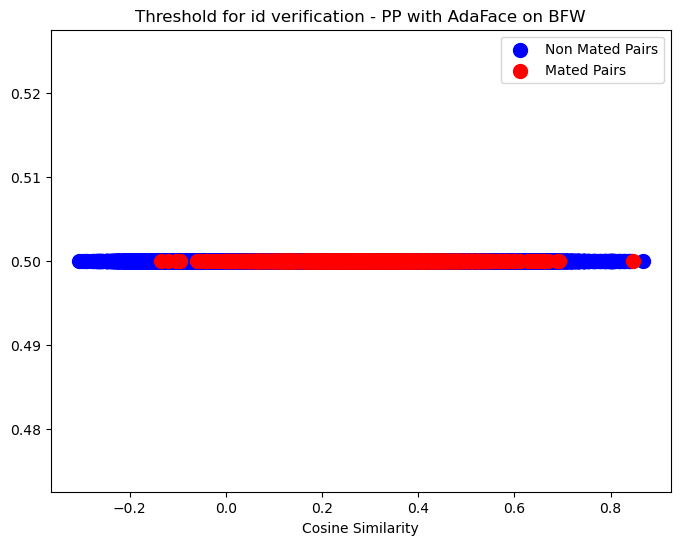

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(non_mated_pairs, [0.5]*len(non_mated_pairs), label="Non Mated Pairs", s=100, color='blue')
plt.scatter(mated_pairs, [0.5]*len(mated_pairs), label="Mated Pairs", s=100, color= 'red')
# plt.plot(age_leakage, id, label=protection)

plt.xlabel('Cosine Similarity')
plt.ylabel('')
plt.title('Threshold for id verification - PP with AdaFace on BFW')
# plt.xlim(0, 110)
# plt.ylim(0, 110)
plt.legend()
plt.show()

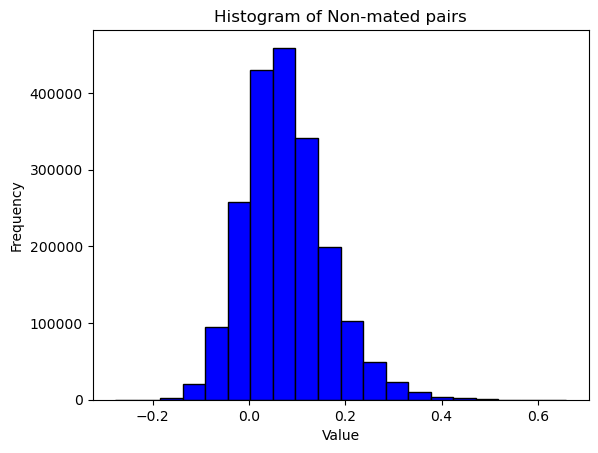

In [124]:
plt.hist(non_mated_pairs, bins=20, color='blue', edgecolor='black')
#plt.hist(mated_pairs, bins=20, color='red', edgecolor='black')


# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Non-mated pairs')

# Show the plot
plt.show()

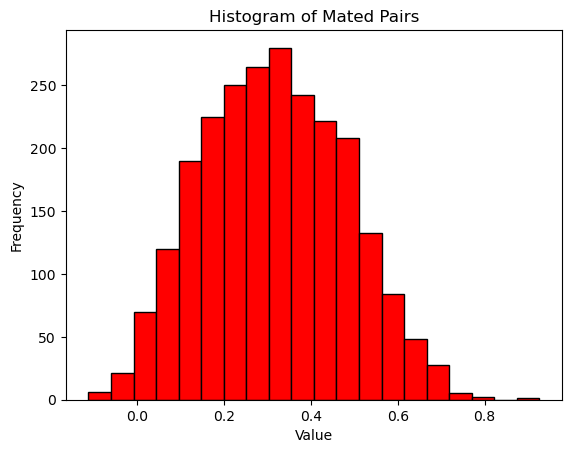

In [125]:
plt.hist(mated_pairs, bins=20, color='red', edgecolor='black')


# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Mated Pairs')

# Show the plot
plt.show()

In [71]:
indices = torch.where(torch.tensor(mated_pairs) >0.5)
indices[0].numpy().shape

(109,)

In [72]:
indices = torch.where(torch.tensor(non_mated_pairs) >0.5)
indices[0].numpy().shape

(10101,)

In [68]:
len(non_mated_pairs)

1597950

In [46]:
mated_pairs

[0.7950550466775894,
 0.8674759119749069,
 0.8839278742671013,
 0.6751168072223663,
 0.465604305267334,
 0.8116217404603958,
 0.8670697808265686,
 0.8953173905611038,
 0.4542214870452881,
 0.9545276500284672,
 0.7997665554285049,
 0.5560246407985687,
 0.6921451985836029,
 0.861744686961174,
 0.8939806744456291,
 0.8826126232743263,
 0.675189197063446,
 0.590941309928894,
 0.2770465612411499,
 0.7180685698986053,
 0.6814736723899841,
 0.5913937985897064,
 0.8377783447504044,
 0.9040995538234711,
 0.6068467497825623,
 0.7035866677761078,
 0.7133178412914276,
 0.6592221856117249,
 0.836042732000351,
 0.5749890804290771,
 0.7216953933238983,
 0.7218151688575745,
 0.7535984516143799,
 0.6583609879016876,
 0.6779728829860687,
 0.6665867567062378,
 0.848327100276947,
 0.6021627485752106,
 0.8079600036144257,
 0.5555300414562225,
 0.5779823958873749,
 0.6989139914512634,
 0.5237853229045868,
 0.811302900314331,
 0.5934669971466064,
 0.5803164839744568,
 0.6504988670349121,
 0.64765864610672,
 

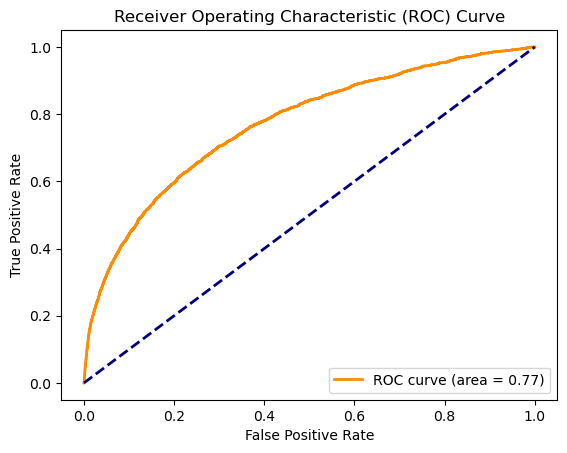

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming cosine_distances_mated and cosine_distances_nonmated are arrays of cosine distances
# between feature vectors for mated and non-mated pairs, respectively.

y_true = [1] * len(mated_pairs) + [0] * len(non_mated_pairs)
y_scores = mated_pairs + non_mated_pairs

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


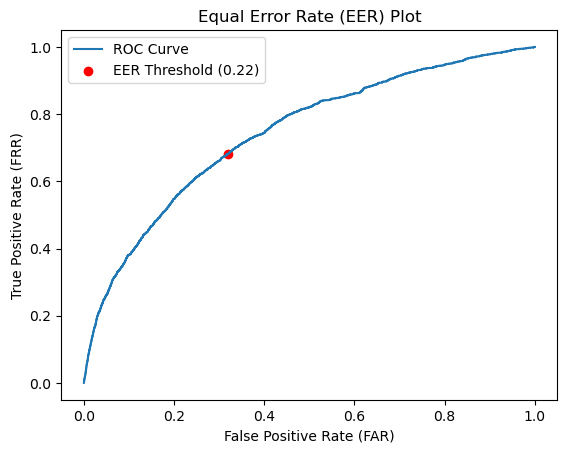

In [74]:
scores = np.concatenate([mated_pairs, non_mated_pairs])
labels = np.concatenate([np.ones_like(mated_pairs), np.zeros_like(non_mated_pairs)])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(labels, scores)

# Calculate Equal Error Rate (EER)
eer_threshold = thresholds[np.argmin(np.abs(fpr - (1 - tpr)))]

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(1 - tpr[np.argmin(np.abs(fpr - (1 - tpr)))], tpr[np.argmin(np.abs(fpr - (1 - tpr)))], c='red', marker='o', label=f'EER Threshold ({eer_threshold:.2f})')
plt.xlabel('False Positive Rate (FAR)')
plt.ylabel('True Positive Rate (FRR)')
plt.title('Equal Error Rate (EER) Plot')
plt.legend()
plt.show()

In [49]:
print(thresholds)
print(tpr)
print(fpr)

[2.18794382 1.18794382 1.15334275 ... 0.16745806 0.1632877  0.09648085]
[0.         0.         0.         ... 0.99985098 0.99985098 1.        ]
[0.00000000e+00 9.60614793e-06 1.34486071e-04 ... 9.99990394e-01
 1.00000000e+00 1.00000000e+00]


In [133]:
# Face Identification
mated_pairs = []
non_mated_pairs = []
base_embeddding = 0
base_id = 0
count = 0
batchSize = 1
#processedTensor = processedTensor.detach().cpu().numpy()
processedTensor = torch.tensor(processedTensor)
random_number = torch.randint(0, 70889, (100,))
cos = nn.CosineSimilarity(dim=0)
accuracy = 0
while(count<processedTensor.shape[0]):

    inputs = processedTensor[count]

    baseid = idLabelTensor[count]

    base_embeddding = inputs
    base_id = baseid
    tempCount = 0
    scores=[]
    ids=[]
    # for x in range(0, len(processedTensor)):
        
    #     if(x!=count):
    tempPT = torch.cat((processedTensor[:count], processedTensor[count+1:]))
    tempIT = torch.cat((idLabelTensor[:count], idLabelTensor[count+1:]))    

    scores = nn.functional.cosine_similarity(base_embeddding, tempPT,dim=1)
    
        
          
    if(tempIT[torch.argmax(scores)]==base_id):
        accuracy = accuracy + 1
        #print(torch.argmax(scores),count)
        #print(tempIT[torch.argmax(scores)],base_id)
    
    count = count +1
    print(count)
    # if(count>25):
    #     break 
   

print("Accuracy: ",accuracy/count)

/tmp/ipykernel_1745090/801282358.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  processedTensor = torch.tensor(processedTensor)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


#Ignore Below

In [20]:
warnings.filterwarnings("ignore", category=UserWarning)


processedTensor = torch.zeros((len(testSet), 128))
identityLabel = torch.zeros((len(testSet)))
count = 0

for i,data in enumerate(testloader):
    
    inputs = data[0].to(device=device)
    iden_label = data[1]['name'].to(device=device)
    inputs = inputs[:, [2, 1, 0], :, :]    
    embeddings,_ = adaFaceModel(inputs)
    encoded, _ = aeModel(embeddings)
    # compressed_img1 = compressionModel1(embeddings)
    # compressed_img2 = compressionModel2(compressed_img1)
    # compressed = combinedModel(embeddings)
    processedTensor[count : count + embeddings.shape[0]] = torch.tensor(encoded)
    identityLabel[count:count + iden_label.shape[0]] = torch.tensor(iden_label)


    count = count + embeddings.shape[0]
    

In [21]:
identityAccuracy = 0

count = 0

while(count < processedTensor.shape[0]):

    currentFace = processedTensor[count : count + 1]
    cosine_similarity = nn.functional.cosine_similarity(currentFace, processedTensor)
    if(identityLabel[torch.topk(cosine_similarity, k = 2)[1][1]].item() == identityLabel[count].item()):
        identityAccuracy = identityAccuracy +1
    count = count + 1
    # print(count)
print(identityAccuracy/count)

0.8325


In [ ]:
# FAmodel.trainCompressionModel(trainloader,testloader,adaFaceModel,compressionModel, compressionLoss, device, 10)

In [ ]:
trainSetDet = CustomDataset('/home/csgrad/byalavar/FHE/celebSet/celebSET_final_v1.csv', get_pairs=False, transform=transform)
trainloaderDet = DataLoader(trainSetDet, batch_size=16, shuffle=True, num_workers=2)

testSetDet = CustomDataset('/home/csgrad/byalavar/FHE/celebSet/final_clebSET_test.csv', get_pairs=False, transform=transform)
testloaderDet = DataLoader(testSetDet, batch_size=16, shuffle=False, num_workers=2)


In [31]:
aeModel = torch.load('/home/csgrad/kaushik3/PolyProtect/PolyProtect_HEAAN/HEAAN/code/CompressionCode/AeModel_20_bs32_82acc_best.pt')
aeModel.to(device)
FAmodel=faceAnalytics()
FAmodel.to(device)
aeModel.eval()
trainingAcc = FAmodel.trainModel(trainloader,testloader,adaFaceModel,aeModel, device,5)

Gender Accuracy: 0.9623919084766325 Age Acc: 0.6096150319513606  ethnAcc: 0.9649875156935491
Test Gender Accuracy: 0.934375 Test Age Accuracy: 0.571875 Test ethnicity Accuracy: 0.925625
Gender Accuracy: 0.969106631494308 Age Acc: 0.5989786849863872  ethnAcc: 0.9704608613466124
Gender Accuracy: 0.971490640296802 Age Acc: 0.5989786849863872  ethnAcc: 0.97325396041699
Test Gender Accuracy: 0.954375 Test Age Accuracy: 0.571875 Test ethnicity Accuracy: 0.921875
Gender Accuracy: 0.9732398538560284 Age Acc: 0.5989786849863872  ethnAcc: 0.9745235509035253


KeyboardInterrupt: 

In [ ]:
FAmodel.test(testloaderDet,adaFaceModel, compressionModel, device)

In [ ]:
torch.save(model,"arcFaceCelebSetBase.pt")

In [ ]:
torch.save(model,"negGenderBaseWiki.pt")

In [ ]:
plt.plot(trainingAcc)

In [ ]:
torch.save(model,"model92.pt")

In [ ]:
count=0
input1=[]
for i,data in enumerate(val_dataloader):
    
    if(count==0):
     inputs=resnet(data["image"].to(device))

 
     input1 = polyprotect(0,inputs[0])

     break
    count=count+1

In [ ]:
input1

In [ ]:
for param in model.parameters():
    print(param.shape)
    print(param[0])
    print(torch.dot(input1,param[1]))
    break 

In [ ]:
input1

In [ ]:
output_directory=""
file_name = "input1.txt"

with open(os.path.join(output_directory, file_name), "w") as file:
        for value in input1:
            file.write(f"{value}\n")

In [ ]:
model=faceAnalytics()
model=torch.load("/home/csgrad/byalavar/FHE/HEAAN/modelUsing0.pt")
model.to(device)
model.test(dataloader,device)

In [ ]:
torch.save(model,"modelUsing0.pt")

In [ ]:
count=0
for param in model.parameters():
    print(param.shape)
    count=count+1
    if(count==2):
        print(param)

In [ ]:
a=nn.Linear(4,2)
input1=torch.rand((1,4))
print("input1",input1)
for param in a.parameters():
    print("param",param)
print(a(input1))


In [ ]:
model=faceAnalytics()
model=torch.load("modelUsing0.pt")
model.to(device)
count=0
ageBias=[]
for param in model.parameters(): 
    print(param.shape)
    if(count==7):
       ageBias = param.tolist()
    count=count+1
print(len(ageBias),len(ageBias[0]))


In [ ]:
ageBias

In [ ]:
bias2

In [ ]:
# Create a list of lists with shape (512, 128)


# Define the directory where you want to save the text files
output_directory = "ageWeights"

# Create the output directory if it doesn't exist
import os
os.makedirs(output_directory, exist_ok=True)

# Write each list to a separate text file


# Write each list to a separate text file
for i, sublist in enumerate(ageWeights):
    # Define the file name with leading zeros
    file_name = f"{i:03d}.txt"

    # Write each value in the sublist on a new line
    with open(os.path.join(output_directory, file_name), "w") as file:
        for value in sublist:
            file.write(f"{value}\n")

print("Files saved successfully.")


In [ ]:
count=1
layer1Bias=[]
for param in model.parameters(): 
    print(param.shape)
    if(count==2):
       layer1Bias = param.tolist()
       break
    count=count+1
print(len(layer1Bias),len(layer1Bias[0]))

In [ ]:
output_directory=""
file_name = "ageBias.txt"

with open(os.path.join(output_directory, file_name), "w") as file:
        for value in ageBias:
            file.write(f"{value}\n")